<a href="https://colab.research.google.com/github/ShutTheFuckUpDonny/AI_course/blob/master/%D0%BD%D0%B5%D0%B4%D0%B5%D0%BB%D1%8F_12_%D0%9F%D0%BE%D0%BB%D0%BD%D0%BE%D1%81%D0%B2%D1%8F%D0%B7%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8%2C_%D0%BE%D0%B1%D1%83%D1%87%D0%B0%D1%8E%D1%89%D0%B0%D1%8F_%D0%B8_%D1%82%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B8_Light_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Создайте модель для распознавания рукописных цифр из набора MNIST (можно воспользоваться ноутбуком 1-го занятия) и проведите ряд тестов:

1. Запустите сеть с различными размерами обучающей и проверочной выборок:

Обучающая выборка 50.000 примеров
Обучающая выборка 10.000 примеров
Обучающая выборка 500 примеров

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(800, input_dim=784, activation='relu'))
    model.add(Dense(400, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
def prepare_data():
    (x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()
    x_train, x_test, y_train, y_test = train_test_split(x_train_org, y_train_org, test_size=t_s)
    x_train = x_train.reshape(int(round(60000*(1-t_s), 1)), 784)
    x_test = x_test.reshape(int(60000*t_s), 784)
    x_train = x_train.astype('float32')
    x_train = x_train / 255
    x_test = x_test.astype('float32')
    x_test = x_test / 255
    y_train = utils.to_categorical(y_train, 10)
    y_test = utils.to_categorical(y_test, 10)
    return x_train, x_test, y_train, y_test


In [ ]:
def fit_model():
    model = create_model()
    x_train, x_test, y_train, y_test = prepare_data()
    print('Обучение сети на обучающей выборке {:.2f}%'.format((1-t_s)*100))
    print(x_train.shape, y_train.shape)
    history = model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.2, verbose=1)
    print()
    scores = model.evaluate(x_test, y_test, verbose=1)
    print(scores)
    print('Доля верных ответов на тестовых данных: ', round(scores[1]*100, 2), '%', sep='')
    print()
    plt.figure(figsize=(12, 7))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'],
             label='Доля верных ответов на обучающем наборе')
    # Выводим график точности на проверочной выборке
    plt.plot(history.history['val_accuracy'],
             label='Доля верных ответов на проверочной выборке')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()
    # Выводим графики ошибки
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], 
             label='Ошибка на обучающем наборе')
    plt.plot(history.history['val_loss'], 
             label='Ошибка на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Ошибка')
    plt.legend()
    plt.show()


Обучение сети на обучающей выборке 83.33%
(50000, 784) (50000, 10)
Epoch 1/15
313/313 [==============================] - 5s 17ms/step - loss: 0.2484 - accuracy: 0.9271 - val_loss: 0.1313 - val_accuracy: 0.9615
Epoch 2/15
313/313 [==============================] - 5s 17ms/step - loss: 0.0916 - accuracy: 0.9718 - val_loss: 0.0972 - val_accuracy: 0.9711
Epoch 3/15
313/313 [==============================] - 5s 17ms/step - loss: 0.0561 - accuracy: 0.9826 - val_loss: 0.0958 - val_accuracy: 0.9696
Epoch 4/15
313/313 [==============================] - 6s 18ms/step - loss: 0.0360 - accuracy: 0.9888 - val_loss: 0.1006 - val_accuracy: 0.9719
Epoch 5/15
313/313 [==============================] - 5s 18ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0901 - val_accuracy: 0.9765
Epoch 6/15
313/313 [==============================] - 5s 17ms/step - loss: 0.0218 - accuracy: 0.9924 - val_loss: 0.0840 - val_accuracy: 0.9776
Epoch 7/15
313/313 [==============================] - 5s 17ms/step - loss: 

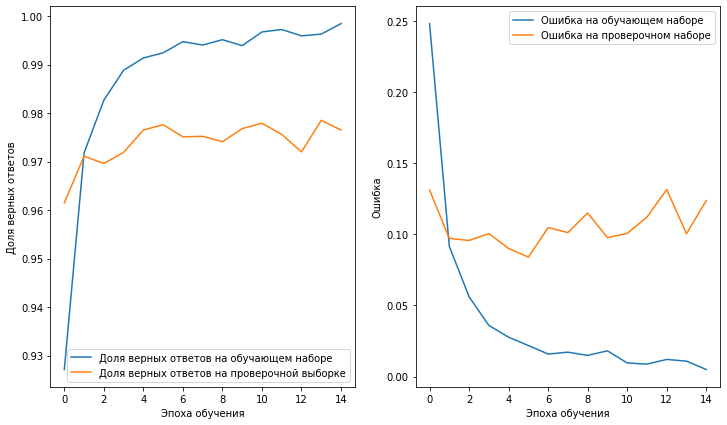

Обучение сети на обучающей выборке 16.67%
(10000, 784) (10000, 10)
Epoch 1/15
63/63 [==============================] - 1s 18ms/step - loss: 0.5615 - accuracy: 0.8403 - val_loss: 0.2462 - val_accuracy: 0.9235
Epoch 2/15
63/63 [==============================] - 1s 17ms/step - loss: 0.1945 - accuracy: 0.9433 - val_loss: 0.1924 - val_accuracy: 0.9370
Epoch 3/15
63/63 [==============================] - 1s 16ms/step - loss: 0.1168 - accuracy: 0.9659 - val_loss: 0.1677 - val_accuracy: 0.9500
Epoch 4/15
63/63 [==============================] - 1s 17ms/step - loss: 0.0692 - accuracy: 0.9818 - val_loss: 0.1446 - val_accuracy: 0.9550
Epoch 5/15
63/63 [==============================] - 1s 17ms/step - loss: 0.0424 - accuracy: 0.9898 - val_loss: 0.1508 - val_accuracy: 0.9525
Epoch 6/15
63/63 [==============================] - 1s 17ms/step - loss: 0.0276 - accuracy: 0.9934 - val_loss: 0.1329 - val_accuracy: 0.9640
Epoch 7/15
63/63 [==============================] - 1s 17ms/step - loss: 0.0164 - accur

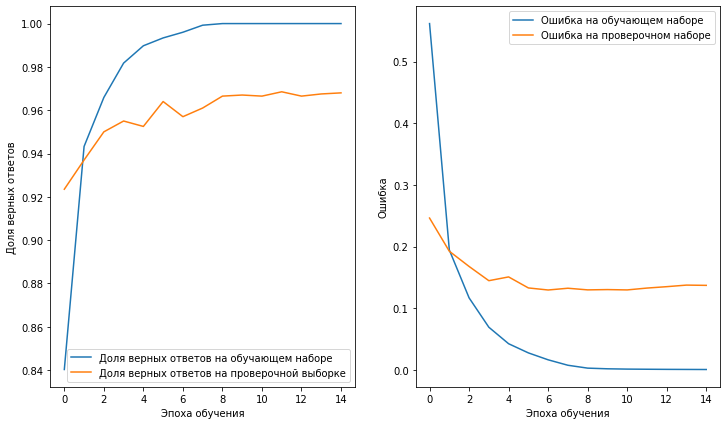

Обучение сети на обучающей выборке 0.83%
(500, 784) (500, 10)
Epoch 1/15
4/4 [==============================] - 0s 42ms/step - loss: 2.0739 - accuracy: 0.2975 - val_loss: 1.2915 - val_accuracy: 0.7600
Epoch 2/15
4/4 [==============================] - 0s 14ms/step - loss: 1.1126 - accuracy: 0.7575 - val_loss: 0.7974 - val_accuracy: 0.8200
Epoch 3/15
4/4 [==============================] - 0s 14ms/step - loss: 0.5891 - accuracy: 0.8500 - val_loss: 0.5228 - val_accuracy: 0.8600
Epoch 4/15
4/4 [==============================] - 0s 14ms/step - loss: 0.3718 - accuracy: 0.9100 - val_loss: 0.5027 - val_accuracy: 0.8600
Epoch 5/15
4/4 [==============================] - 0s 17ms/step - loss: 0.2748 - accuracy: 0.9150 - val_loss: 0.4374 - val_accuracy: 0.8900
Epoch 6/15
4/4 [==============================] - 0s 16ms/step - loss: 0.2288 - accuracy: 0.9350 - val_loss: 0.4140 - val_accuracy: 0.8700
Epoch 7/15
4/4 [==============================] - 0s 16ms/step - loss: 0.1602 - accuracy: 0.9525 - val_l

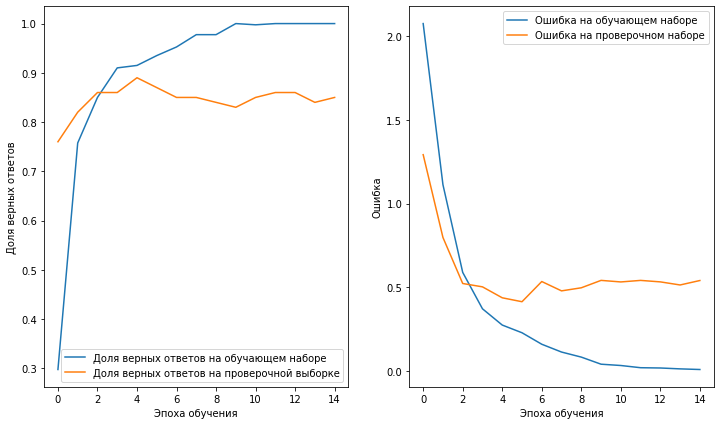

In [ ]:
# размер обучающей выборки 50000, 10000, 500 соответственно путем изменения test_size
for t_s in (1/6, 5/6, 119/120):
    fit_model()

Вывод.

С уменьшением размера выборки уменьшается и доля верных ответов на тестовой выборки. При этом точность сети на обучающей выборке становится равной 100% (на выборках в 10000 и 500 примеров).
Стоит заметить в целом качество обучающей выборки, т.к. при размерах в 50000 и 10000 примеров, разница результатов проверки на тестовых данных составила 1.96% в пользу большей выборки.
